In [154]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import ConfusionMatrixDisplay
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [156]:
df = pd.read_csv('en.openfoodfacts.org.products.csv', sep='\t')

## Analyse de Forme :

### variable target : 
nutriscore_grade

### lignes et colonnes : 
(2059358, 187)

### types de variables : 
qualitatives : 60, quantitatives : 128

###  variables Explicative :

Source calcul:

https://nutriscore.colruytgroup.com/colruytgroup/fr/nutri-score-calculateur/

Énergie (en kJ) OK = energy_100g

Total de matières grasses (en g) = fat_100g

Acides gras saturés (en g) = saturated-fat_100g

Sucres (en g) OK = sugars_100g

Protéines (en g) OK = proteins_100g

Fibres (en g) OK = fiber_100g

Sel (en g) OK = salt_100g

In [157]:
df.head(10)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,abbreviated_product_name,generic_name,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,00000000000000225,http://world-en.openfoodfacts.org/product/0000...,nutrinet-sante,1623855208,2021-06-16T14:53:28Z,1623855209,2021-06-16T14:53:29Z,jeunes pousses,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,00000000000003429145,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1630483911,2021-09-01T08:11:51Z,1630484064,2021-09-01T08:14:24Z,L.casei,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0000000000017,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1529059080,2018-06-15T10:38:00Z,1561463718,2019-06-25T11:55:18Z,Vitória crackers,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0000000000031,http://world-en.openfoodfacts.org/product/0000...,isagoofy,1539464774,2018-10-13T21:06:14Z,1539464817,2018-10-13T21:06:57Z,Cacao,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,000000000003327986,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1574175736,2019-11-19T15:02:16Z,1624390765,2021-06-22T19:39:25Z,Filetes de pollo empanado,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,000000000004622327,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1619501895,2021-04-27T05:38:15Z,1619501897,2021-04-27T05:38:17Z,Hamburguesas de ternera 100%,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,00000000001,http://world-en.openfoodfacts.org/product/0000...,inf,1634745456,2021-10-20T15:57:36Z,1634745530,2021-10-20T15:58:50Z,hyde icon,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0000000000100,http://world-en.openfoodfacts.org/product/0000...,del51,1444572561,2015-10-11T14:09:21Z,1444659212,2015-10-12T14:13:32Z,moutarde au moût de raisin,NaN,NaN,...,NaN,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0000000000123,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1535737982,2018-08-31T17:53:02Z,1535737986,2018-08-31T17:53:06Z,Sauce Sweety chili 0%,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0000000000178,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1542456332,2018-11-17T12:05:32Z,1542456333,2018-11-17T12:05:33Z,Mini coco,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [158]:
df.shape

(2059358, 187)

In [159]:
list(df.columns.values)


['code',
 'url',
 'creator',
 'created_t',
 'created_datetime',
 'last_modified_t',
 'last_modified_datetime',
 'product_name',
 'abbreviated_product_name',
 'generic_name',
 'quantity',
 'packaging',
 'packaging_tags',
 'packaging_text',
 'brands',
 'brands_tags',
 'categories',
 'categories_tags',
 'categories_en',
 'origins',
 'origins_tags',
 'origins_en',
 'manufacturing_places',
 'manufacturing_places_tags',
 'labels',
 'labels_tags',
 'labels_en',
 'emb_codes',
 'emb_codes_tags',
 'first_packaging_code_geo',
 'cities',
 'cities_tags',
 'purchase_places',
 'stores',
 'countries',
 'countries_tags',
 'countries_en',
 'ingredients_text',
 'allergens',
 'allergens_en',
 'traces',
 'traces_tags',
 'traces_en',
 'serving_size',
 'serving_quantity',
 'no_nutriments',
 'additives_n',
 'additives',
 'additives_tags',
 'additives_en',
 'ingredients_from_palm_oil_n',
 'ingredients_from_palm_oil',
 'ingredients_from_palm_oil_tags',
 'ingredients_that_may_be_from_palm_oil_n',
 'ingredients_t

In [160]:
df.dtypes.value_counts()

float64    125
object      60
int64        2
dtype: int64

In [161]:
# Valeur manquante Target

df['nutriscore_grade'].isna().sum()

1327641

In [162]:
## Analyse percent nan df no clean
data = (df.isna().sum()/df.shape[0]).sort_values(ascending=True)
percent_nan = pd.DataFrame(data)


In [163]:
pd.set_option('display.max_rows', None)

In [164]:
percent_nan

,0
code,0.000000
url,0.000000
created_t,0.000000
created_datetime,0.000000
last_modified_t,0.000000
last_modified_datetime,0.000000
states,0.000000
states_tags,0.000000
states_en,0.000000
creator,0.000002


In [165]:
### df clean column target
df_clean = df[df['nutriscore_grade'].notna()]

In [166]:
df_clean.shape

(731717, 187)

In [167]:
## clean column target
target_clean = (df_clean.isna().sum()/df_clean.shape[0]).sort_values(ascending=True)
percent_nan_clean = pd.DataFrame(target_clean)

In [168]:
percent_nan_clean

,0
code,0.000000
nutriscore_score,0.000000
nutriscore_grade,0.000000
pnns_groups_1,0.000000
pnns_groups_2,0.000000
states_en,0.000000
states,0.000000
states_tags,0.000000
last_modified_t,0.000000
created_datetime,0.000000


In [169]:
### check class target ok
df_clean['nutriscore_grade'].unique()

array(['d', 'b', 'a', 'c', 'e'], dtype=object)

In [170]:
### Check correlation heat map// test valeur nan <0.85
df_nan_inf_06 = df_clean[df_clean.columns[df_clean.isna().sum()/df_clean.shape[0] <0.85]]

In [172]:
list(df_nan_inf_06.columns.values)


['code',
 'url',
 'creator',
 'created_t',
 'created_datetime',
 'last_modified_t',
 'last_modified_datetime',
 'product_name',
 'quantity',
 'packaging',
 'packaging_tags',
 'brands',
 'brands_tags',
 'categories',
 'categories_tags',
 'categories_en',
 'labels',
 'labels_tags',
 'labels_en',
 'purchase_places',
 'stores',
 'countries',
 'countries_tags',
 'countries_en',
 'ingredients_text',
 'allergens',
 'serving_size',
 'serving_quantity',
 'additives_n',
 'additives_tags',
 'additives_en',
 'ingredients_from_palm_oil_n',
 'ingredients_that_may_be_from_palm_oil_n',
 'nutriscore_score',
 'nutriscore_grade',
 'nova_group',
 'pnns_groups_1',
 'pnns_groups_2',
 'states',
 'states_tags',
 'states_en',
 'brand_owner',
 'main_category',
 'main_category_en',
 'image_url',
 'image_small_url',
 'image_ingredients_url',
 'image_ingredients_small_url',
 'image_nutrition_url',
 'image_nutrition_small_url',
 'energy-kj_100g',
 'energy-kcal_100g',
 'energy_100g',
 'fat_100g',
 'saturated-fat_100

<AxesSubplot:>

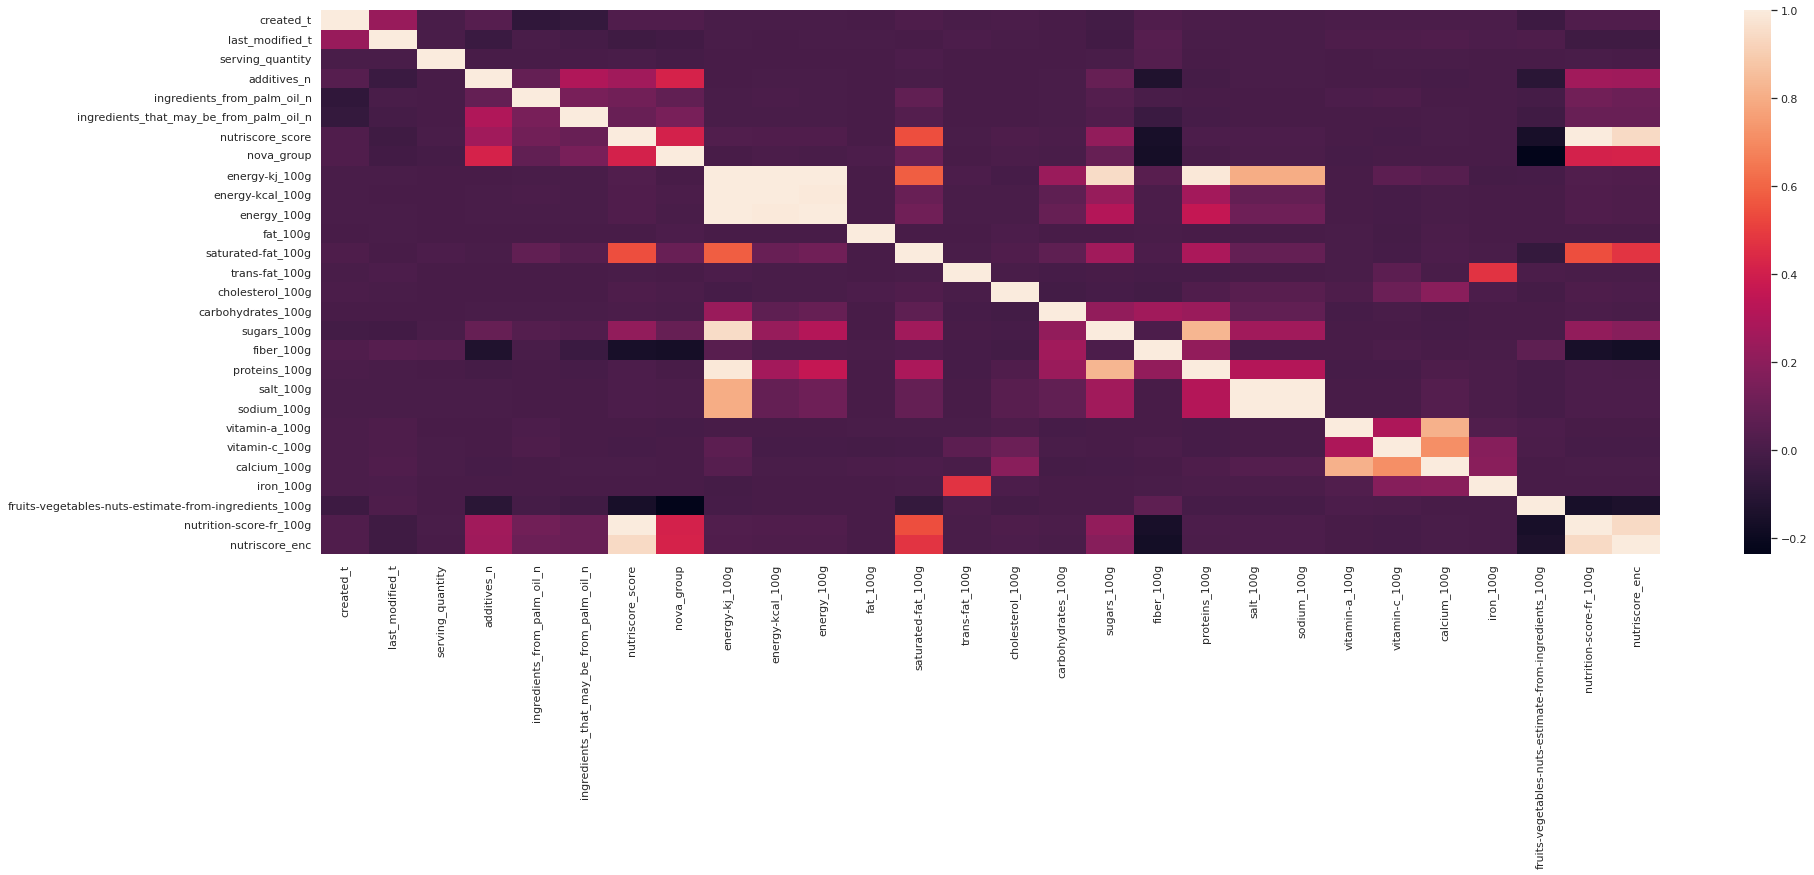

In [174]:
plt.figure(figsize=(30,10))
sns.heatmap(df_nan_inf_06.corr())

In [175]:
column_explicative = ["energy_100g","fat_100g","saturated-fat_100g",
                      "sugars_100g","proteins_100g","fiber_100g",
                     "salt_100g","nutriscore_grade",]

In [176]:
df_var_ok = df_clean[column_explicative]

In [177]:
df_var_ok.shape

(731717, 8)

In [178]:
df_var_ok.head(10)

,energy_100g,fat_100g,saturated-fat_100g,sugars_100g,proteins_100g,fiber_100g,salt_100g,nutriscore_grade
7,936.0,8.2,2.2,22.0,5.1,0.0,4.600,d
17,134.0,0.3,0.1,3.9,0.9,NaN,0.420,b
26,1594.0,22.0,15.5,21.9,4.6,4.4,0.100,d
36,657.0,0.0,0.0,27.0,0.6,3.6,0.000,a
40,598.0,12.7,1.0,1.0,1.9,NaN,0.270,b
67,1661.0,33.0,21.6,0.1,25.0,NaN,1.300,d
69,824.0,13.0,4.0,0.9,17.0,NaN,1.100,c
70,824.0,5.0,1.1,3.0,8.4,NaN,0.467,b
73,669.0,2.2,0.5,0.6,9.5,1.6,0.358,a
75,1059.0,17.0,2.6,0.5,23.0,NaN,2.500,d


In [179]:
## Repartion des classes
df_var_ok['nutriscore_grade'].value_counts()

d    227245
c    157393
e    134852
a    116818
b     95409
Name: nutriscore_grade, dtype: int64

In [180]:
df_mini = df_var_ok.head(200000)

In [181]:
df_mini.shape

(200000, 8)

In [182]:
df_mini['nutriscore_grade'].value_counts()

d    64911
c    38054
a    37235
e    36372
b    23428
Name: nutriscore_grade, dtype: int64

In [183]:
df_drop_na = df_mini.dropna()

In [184]:
df_drop_na['nutriscore_grade'].value_counts()

d    54012
a    34124
c    32504
e    30456
b    19975
Name: nutriscore_grade, dtype: int64

In [185]:
df_drop_na.dtypes.value_counts()

float64    7
object     1
dtype: int64

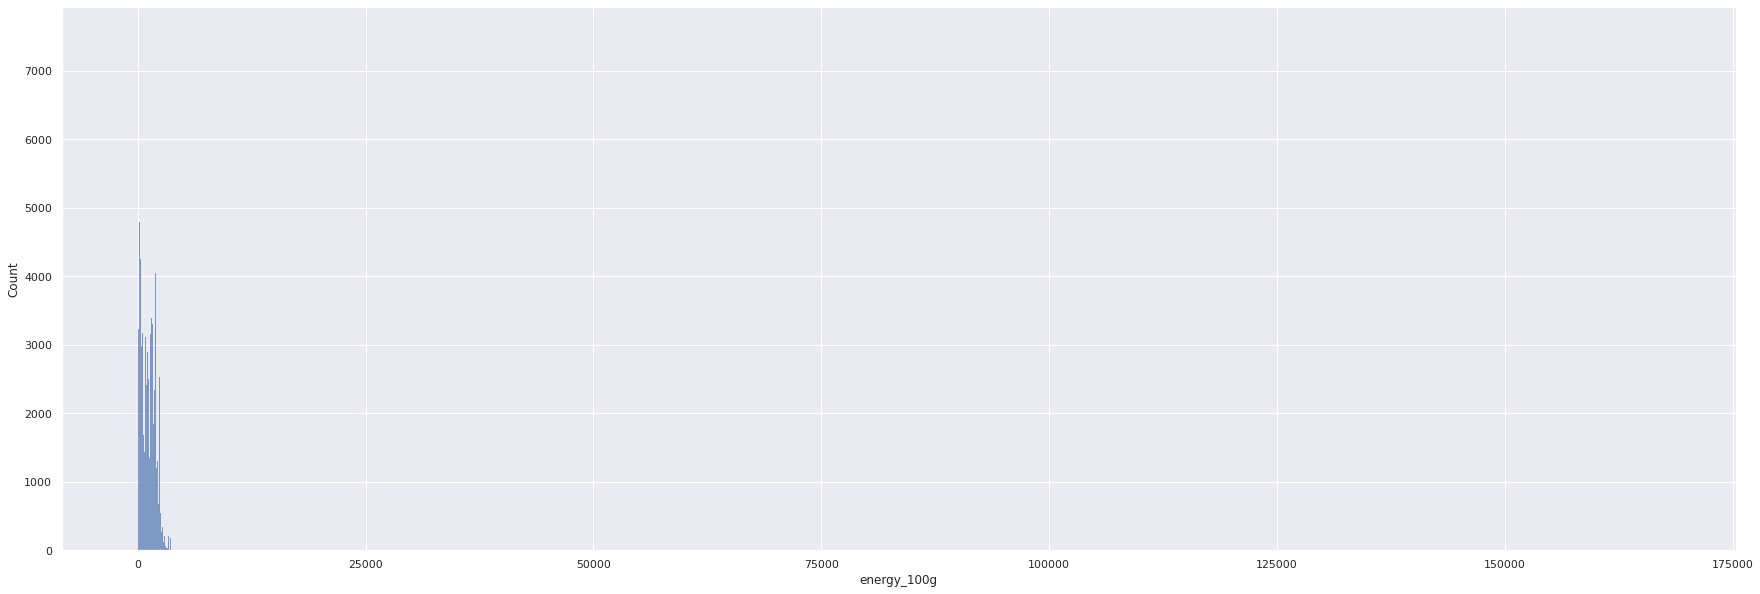

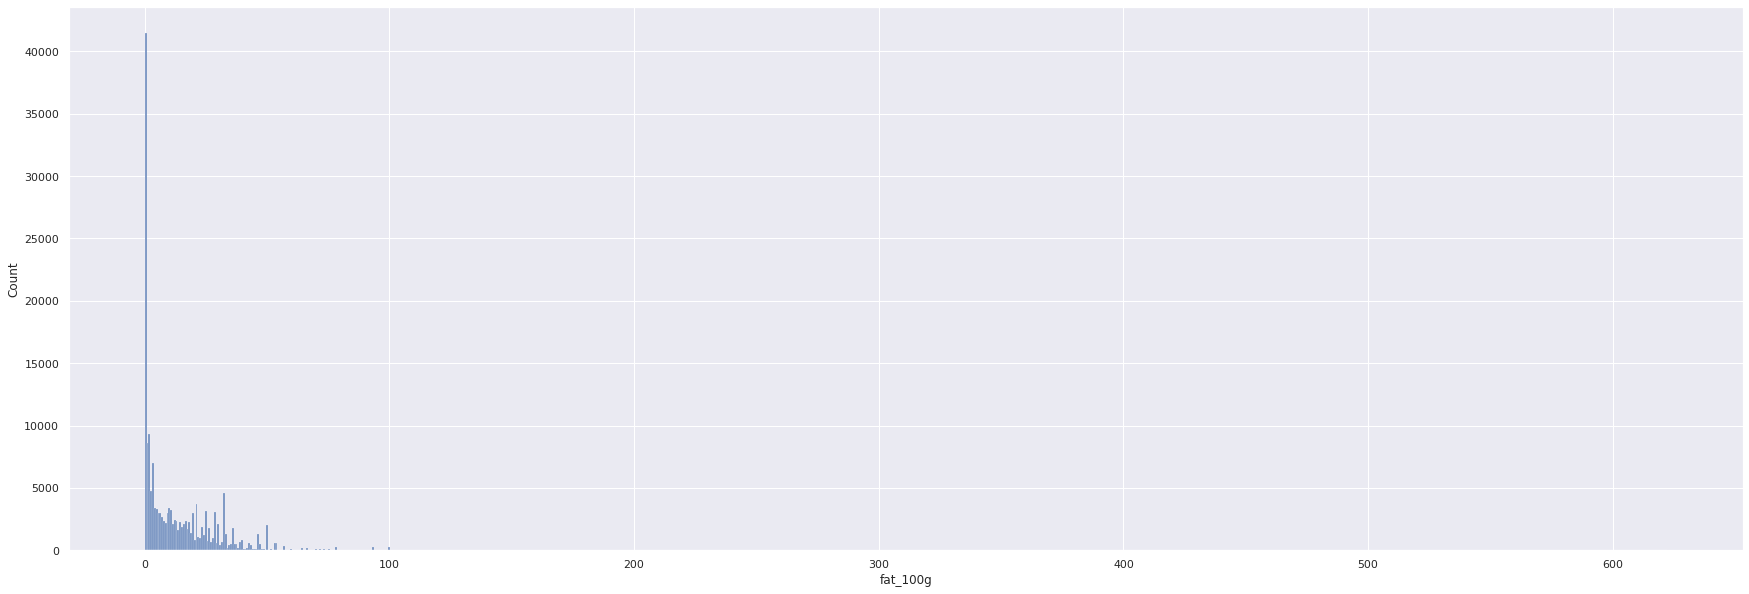

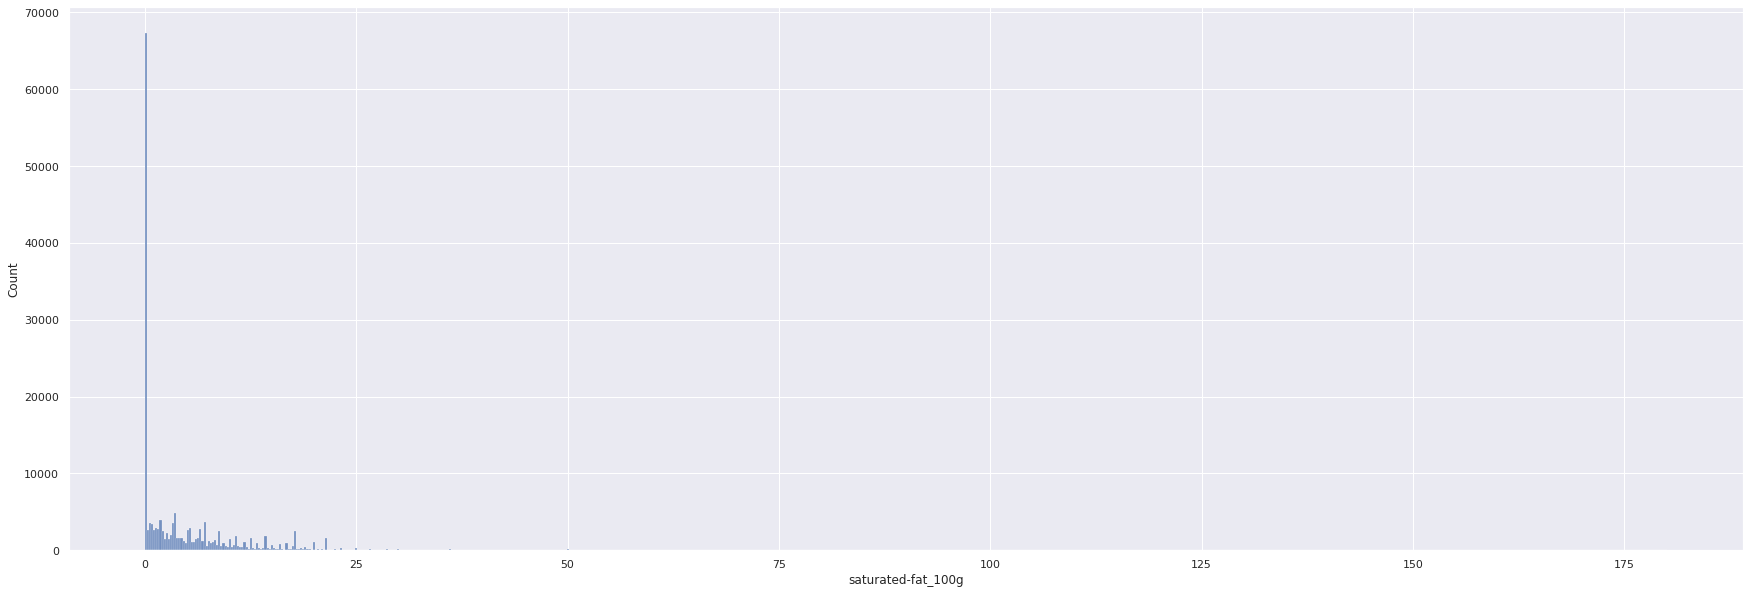

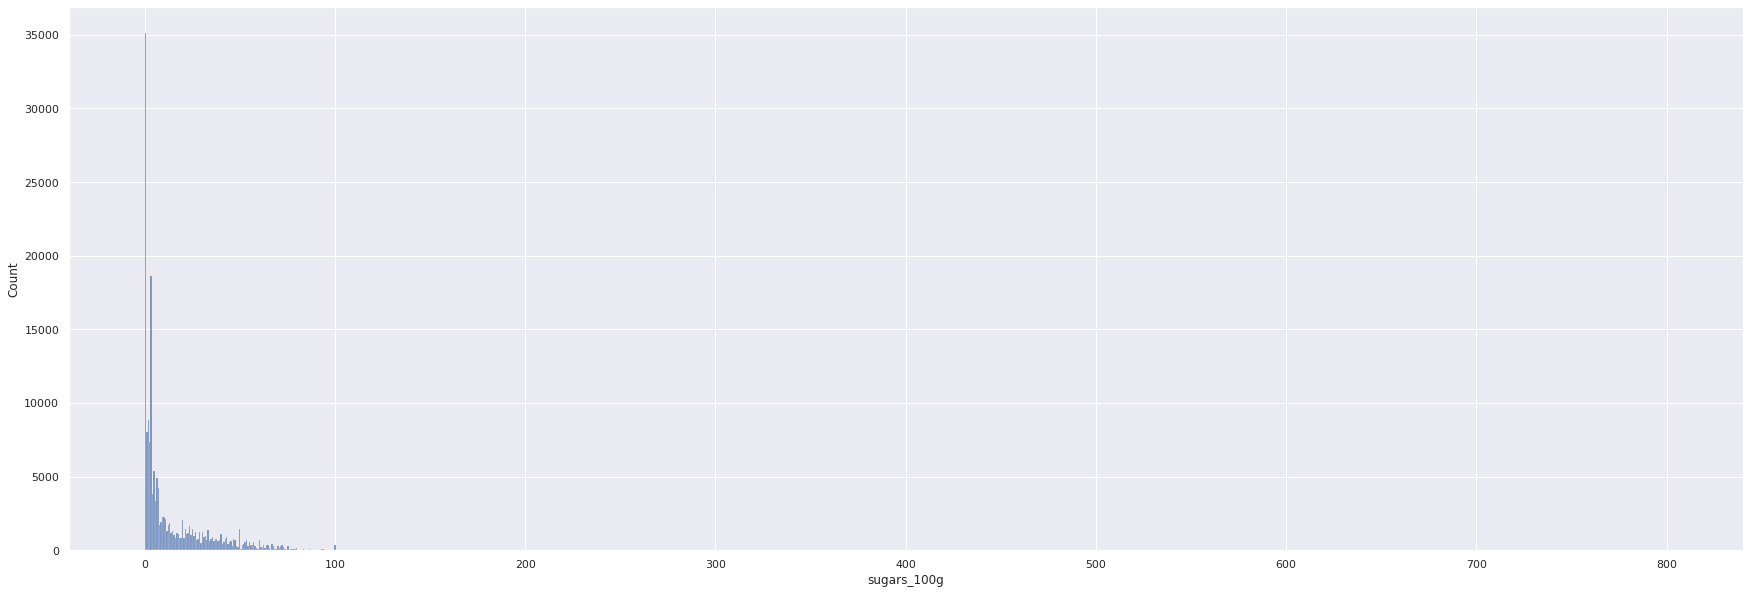

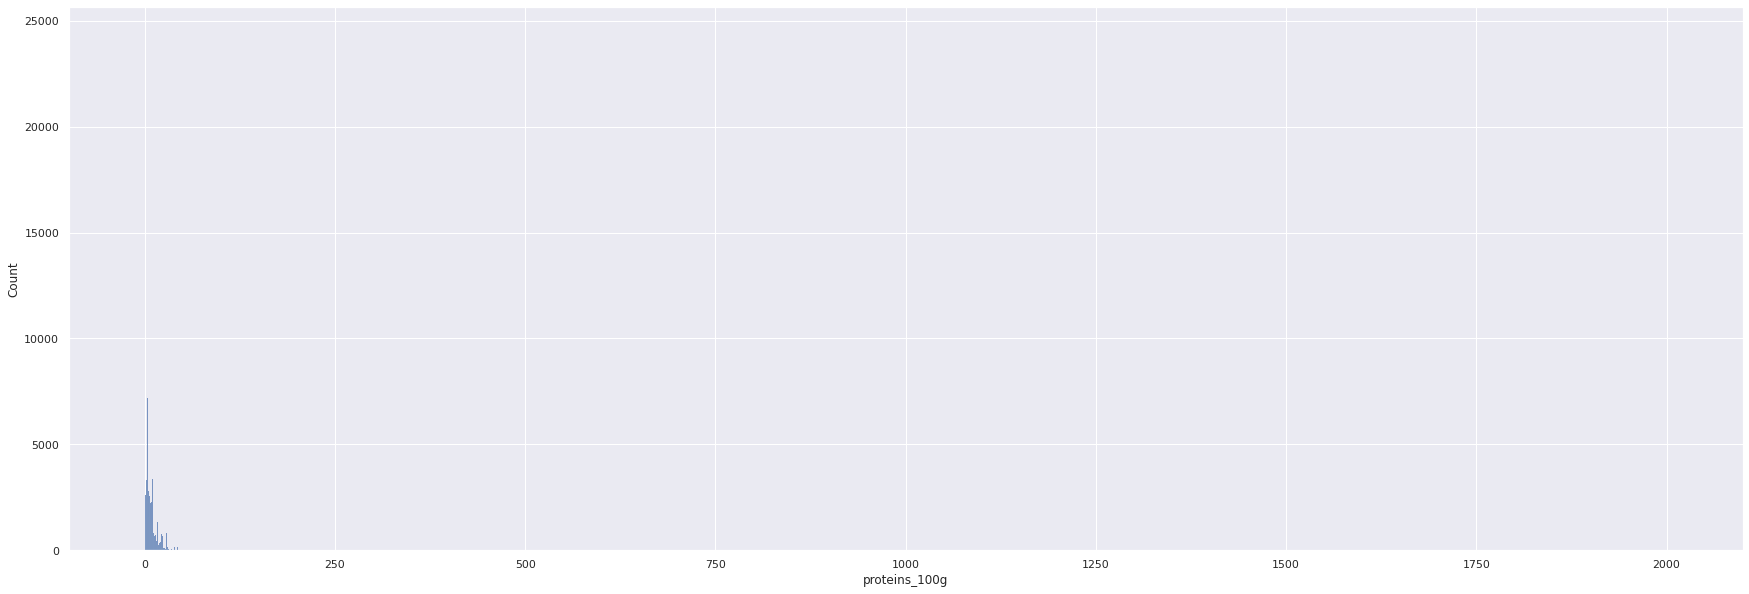

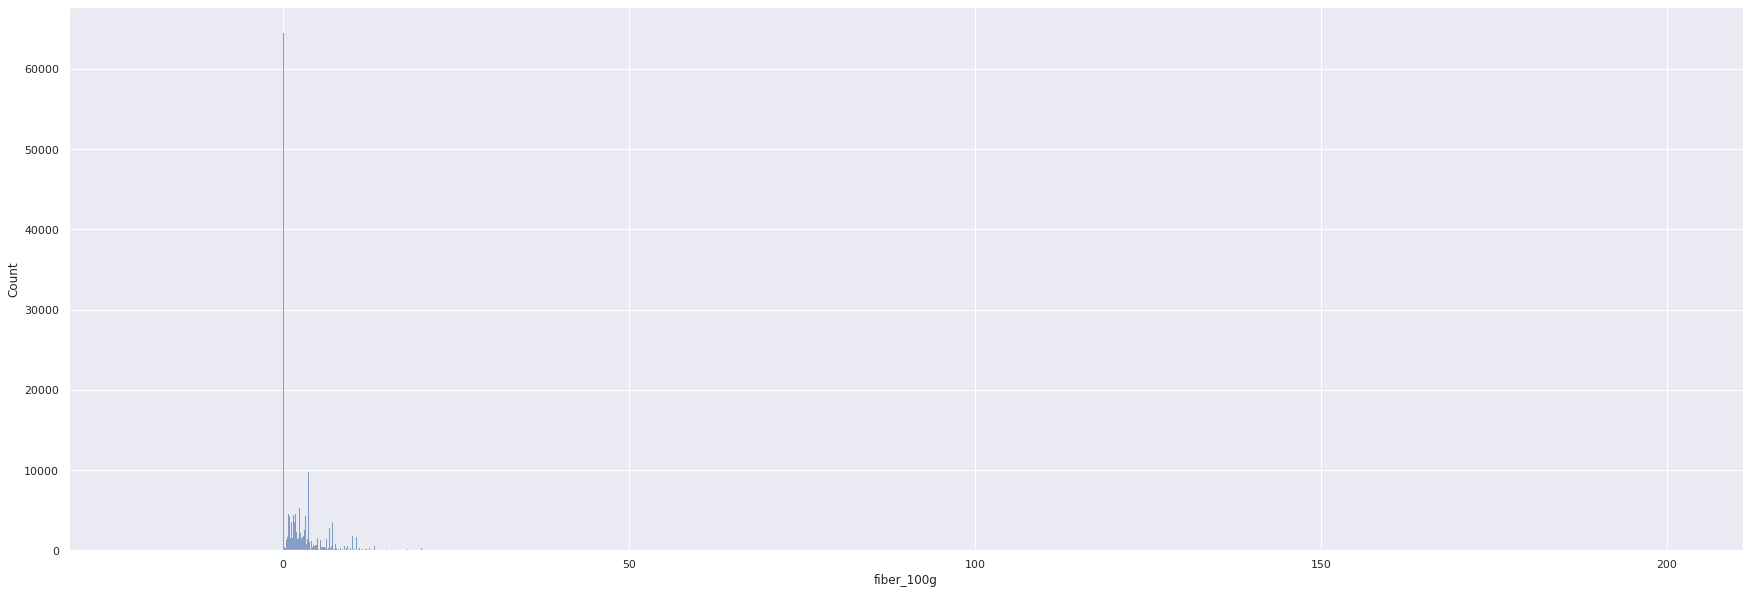

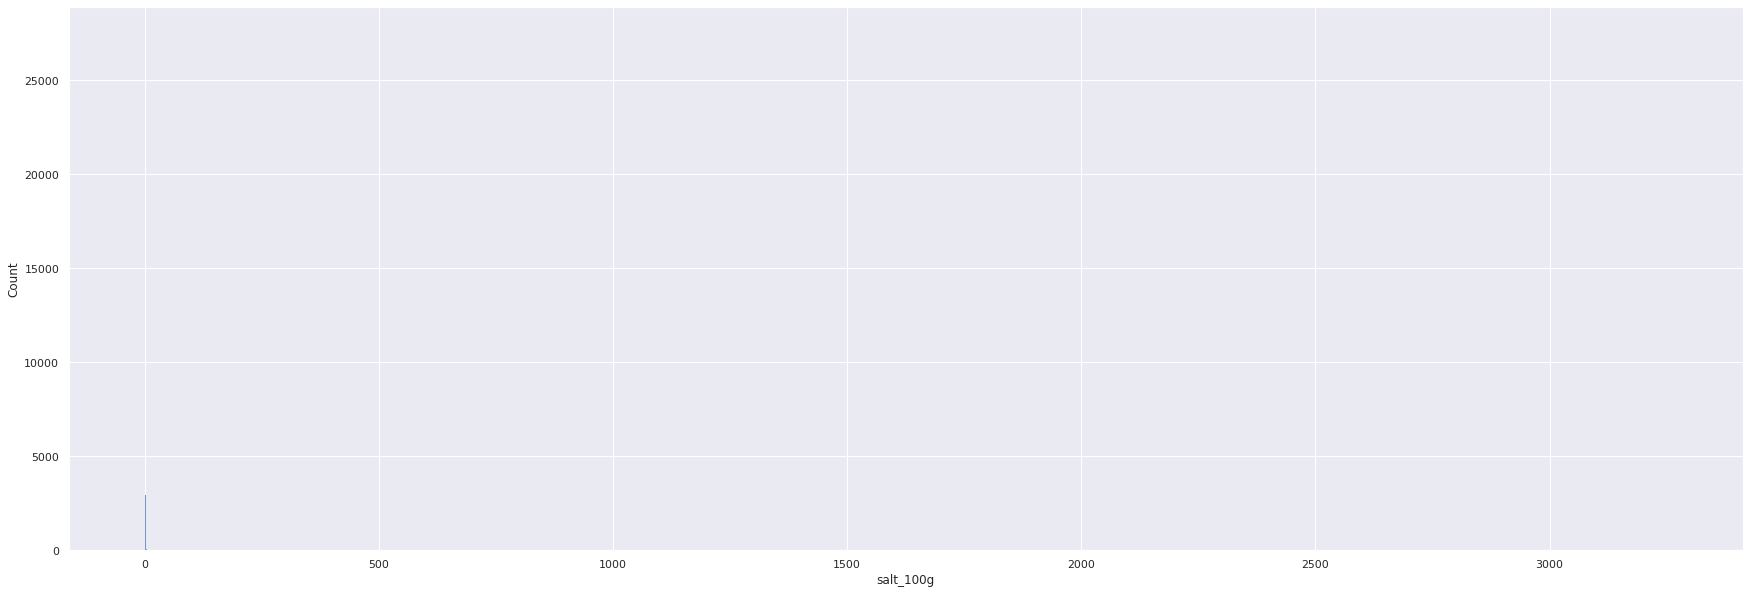

In [186]:
for col in df_drop_na.select_dtypes('float'):
    plt.figure(figsize=(30,10))
    sns.histplot(df_drop_na[col])

In [187]:
df_drop_na.describe()

,energy_100g,fat_100g,saturated-fat_100g,sugars_100g,proteins_100g,fiber_100g,salt_100g
count,171071.000000,171071.000000,171071.000000,171071.000000,171071.000000,171071.000000,171071.000000
mean,1175.977752,12.929401,4.533657,14.309651,7.931588,2.593647,1.492380
std,850.169639,15.419486,6.628056,18.946465,9.398462,4.104828,20.089256
min,0.000000,0.000000,0.000000,0.000000,0.000000,-20.000000,0.000000
25%,452.000000,0.811977,0.000000,1.430000,2.350000,0.000000,0.145000
50%,1197.000000,7.140000,1.760000,5.000000,5.710000,1.400000,0.747500
75%,1674.000000,21.430000,6.900000,22.220000,10.940000,3.600000,1.427500
max,167000.000000,622.000000,180.000000,800.000000,2000.000000,200.000000,3250.000000


In [190]:
df_drop_na.shape

(168911, 8)

In [191]:
for col in df_drop_na.select_dtypes('float'):
    indexName = df_drop_na[((df_drop_na[col]-df_drop_na[col].mean())/df_drop_na[col].std())>=3].index
    df_drop_na.drop(indexName,inplace=True)

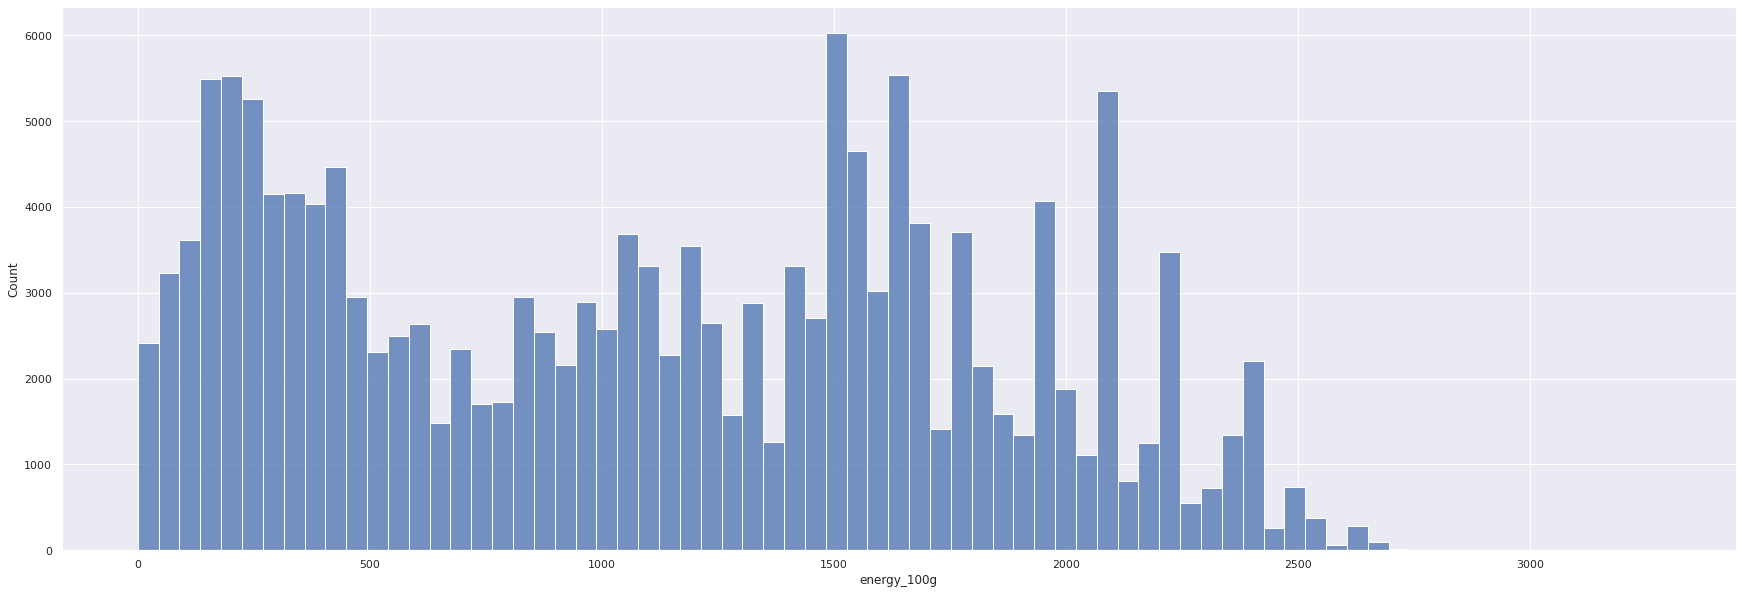

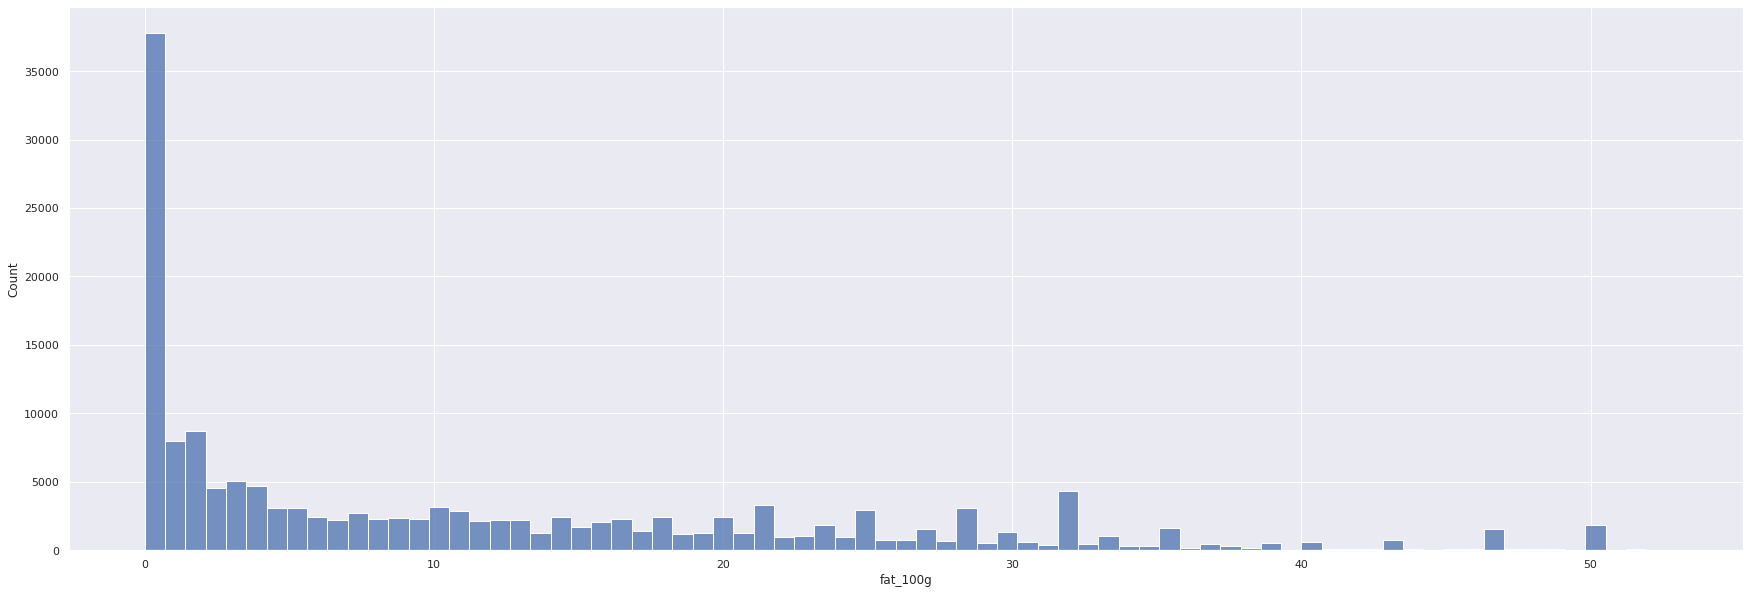

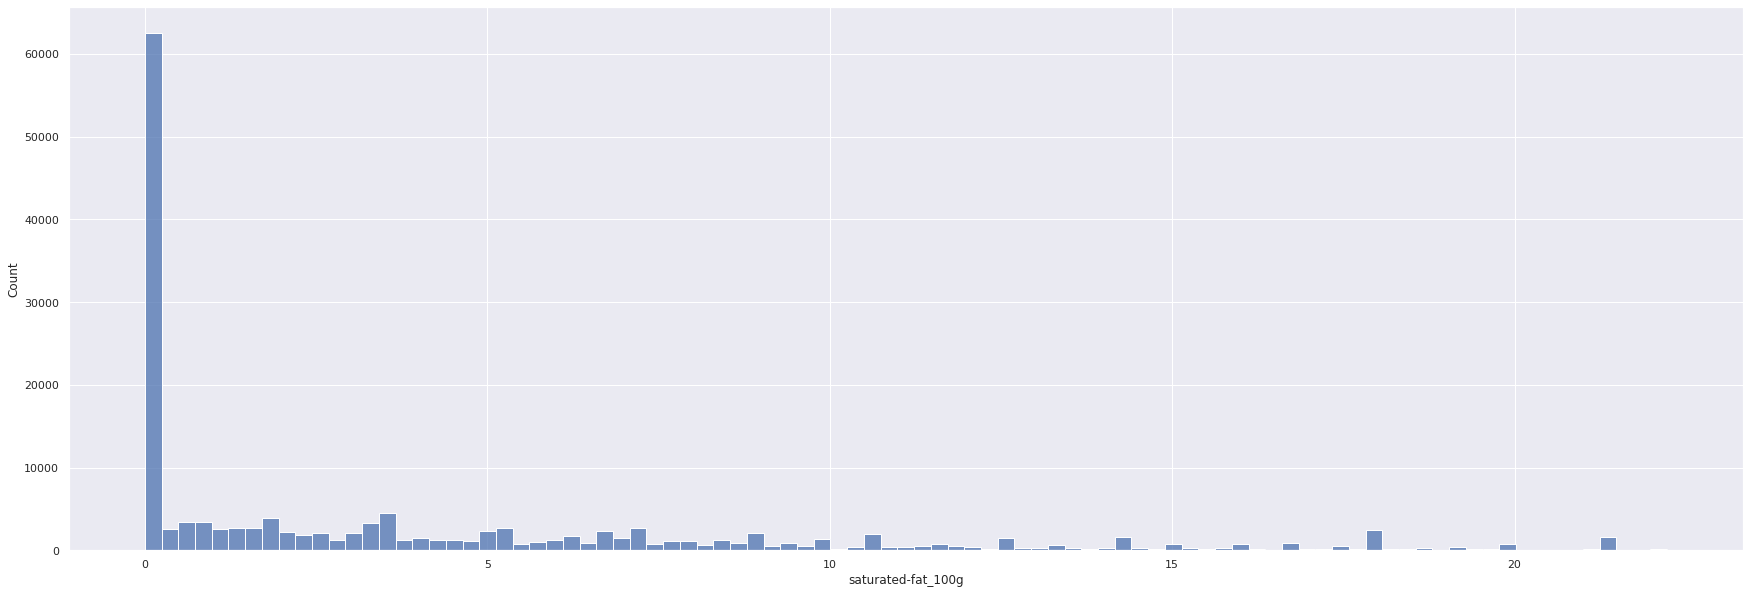

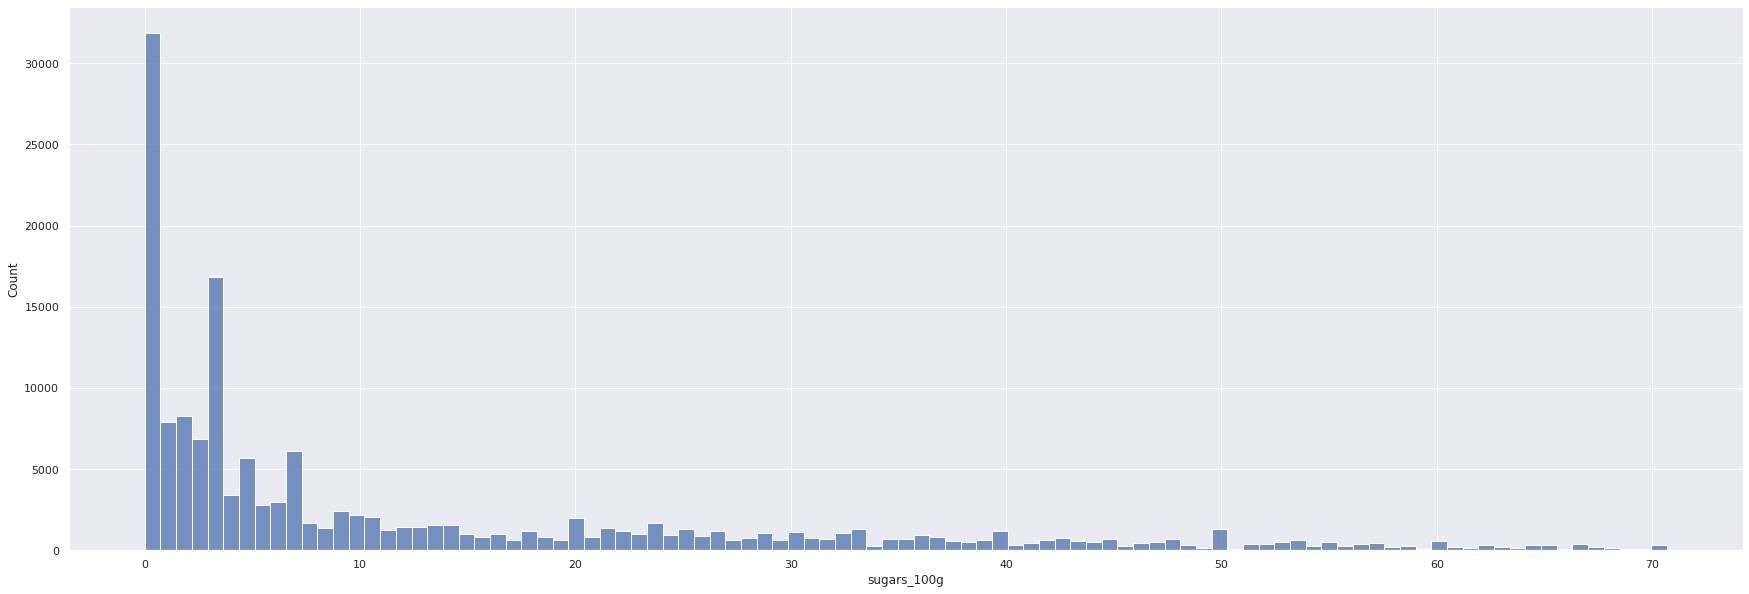

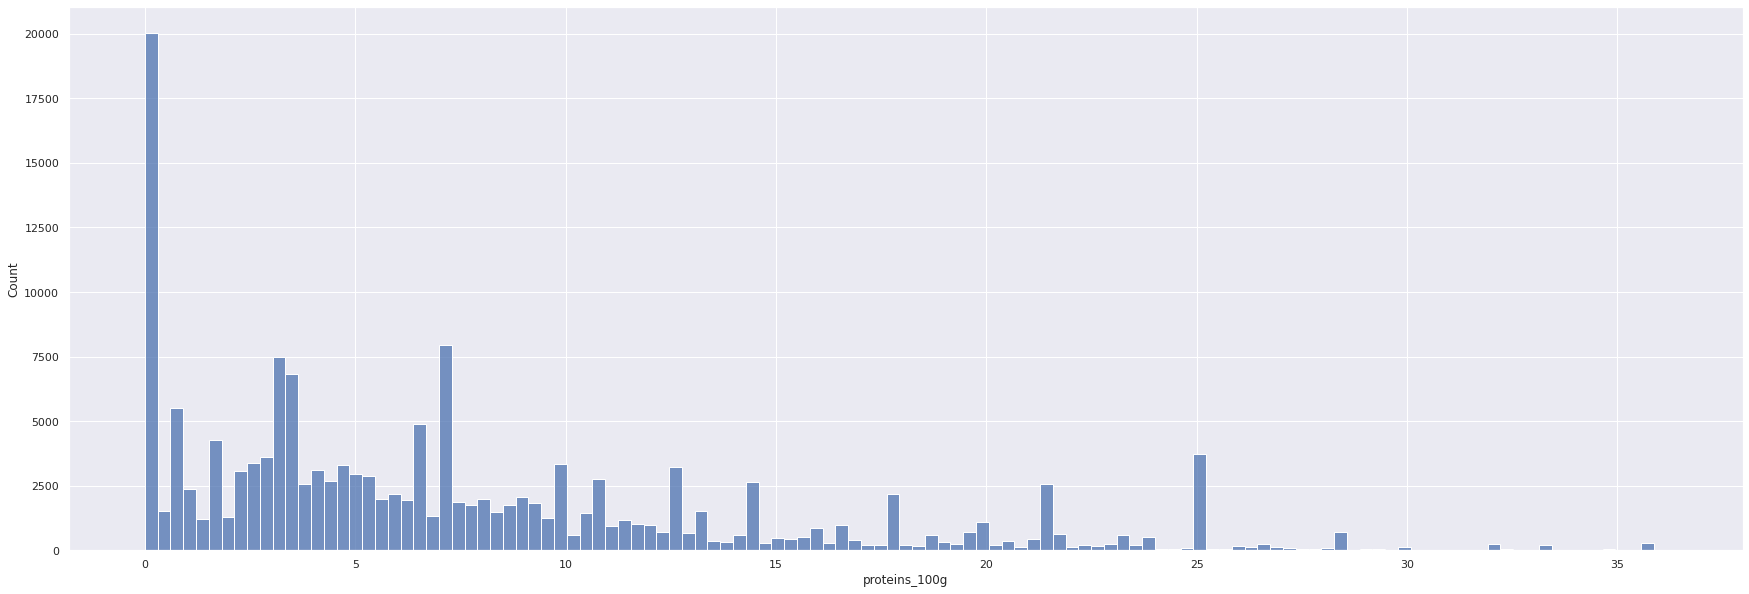

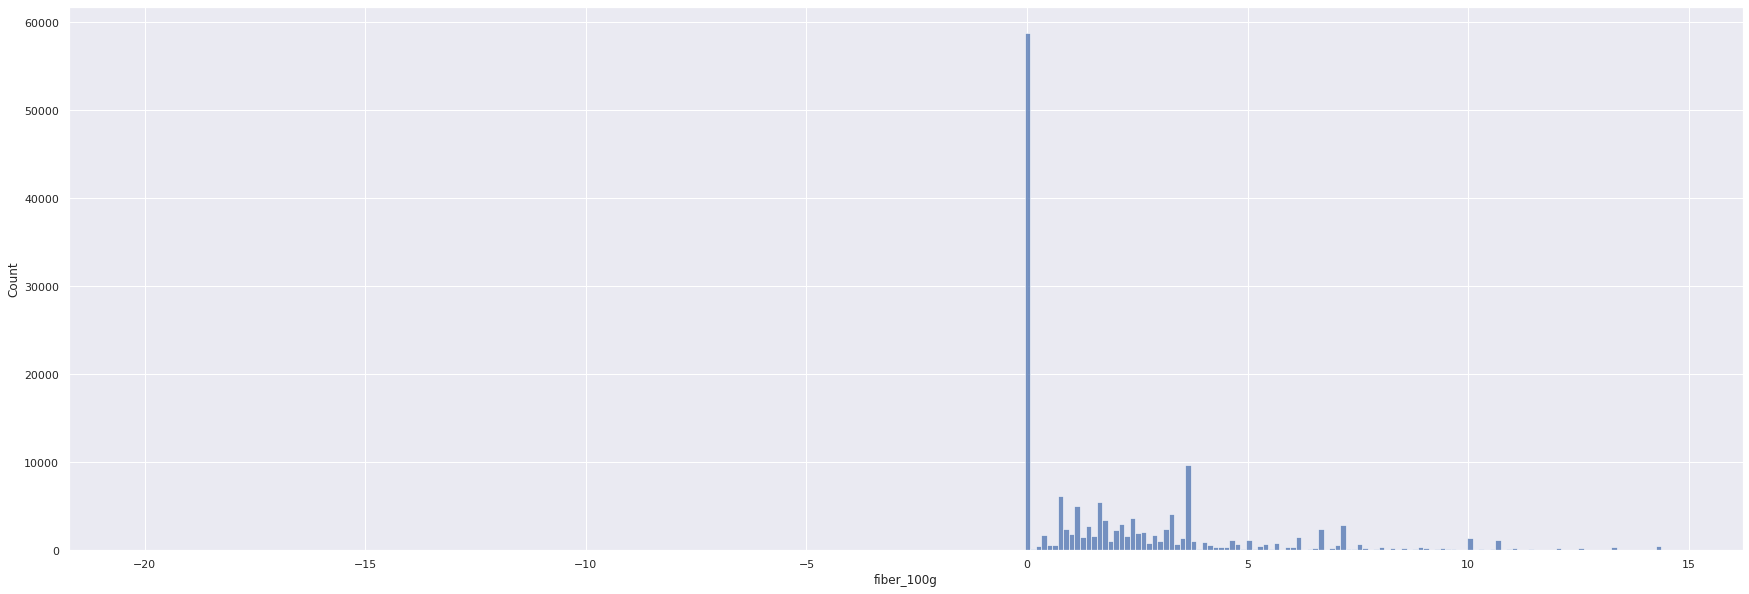

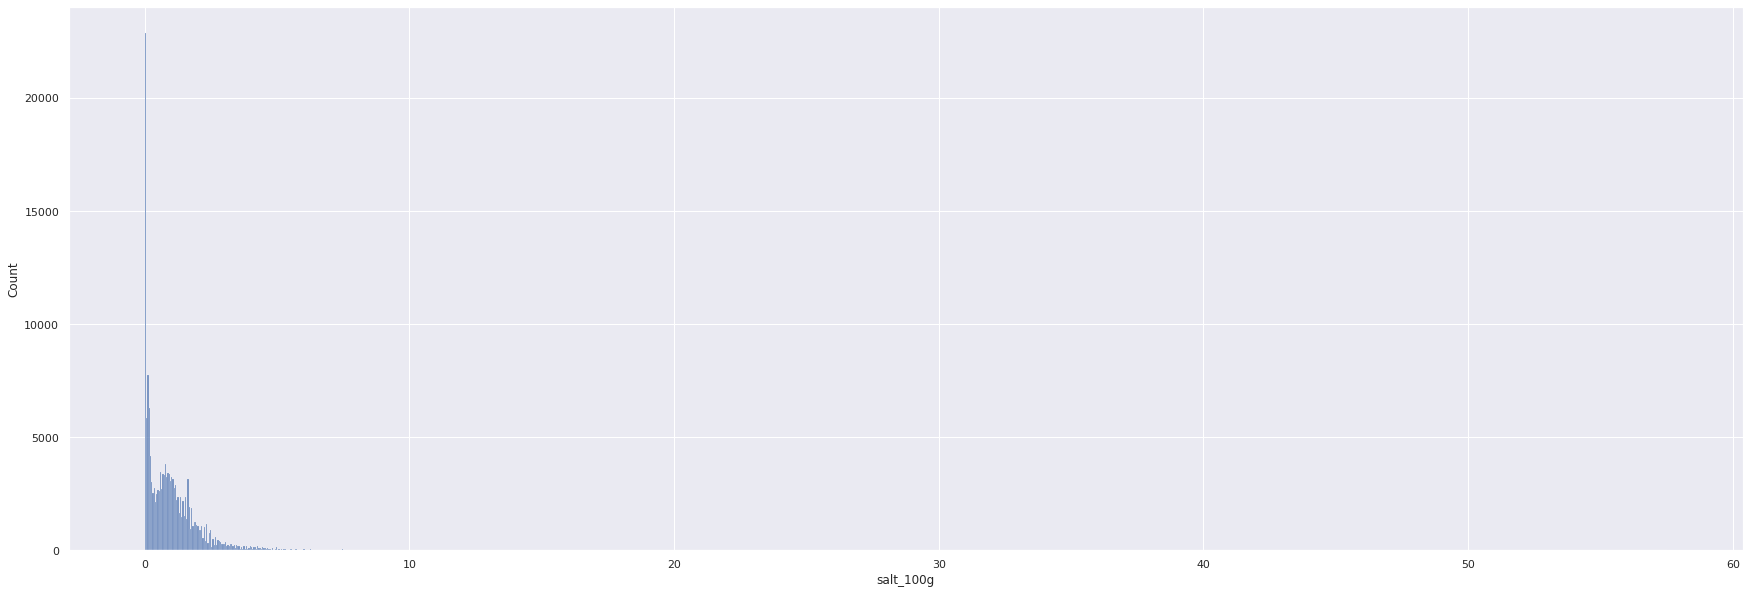

In [192]:
for col in df_drop_na.select_dtypes('float'):
    plt.figure(figsize=(30,10))
    sns.histplot(df_drop_na[col])

In [194]:
df_drop_na.shape

(158189, 8)

In [195]:
df_drop_na['nutriscore_grade'].value_counts()

d    49131
a    31996
c    30447
e    27031
b    19584
Name: nutriscore_grade, dtype: int64

In [196]:
from sklearn.utils import resample
df_1 = df_drop_na[df_drop_na['nutriscore_grade'] == "d"]
df_2 = df_drop_na[df_drop_na['nutriscore_grade'] == "a"] 
df_3 = df_drop_na[df_drop_na['nutriscore_grade'] == "e"] 
df_4 = df_drop_na[df_drop_na['nutriscore_grade'] == "c"] 
df_5= df_drop_na[df_drop_na['nutriscore_grade'] == "b"] 


df_1_upsampled = resample(df_1,random_state=42,n_samples=19667,replace=True)
df_2_upsampled = resample(df_2,random_state=42,n_samples=19667,replace=True)
df_3_upsampled = resample(df_3,random_state=42,n_samples=19667,replace=True)
df_4_upsampled = resample(df_4,random_state=42,n_samples=19667,replace=True)

df_upsampled = pd.concat([df_1_upsampled,df_2_upsampled,df_3_upsampled,df_4_upsampled,df_5])


In [197]:
df_upsampled['nutriscore_grade'].value_counts()

d    19667
a    19667
e    19667
c    19667
b    19584
Name: nutriscore_grade, dtype: int64

In [198]:
df_upsampled.head(10)

,energy_100g,fat_100g,saturated-fat_100g,sugars_100g,proteins_100g,fiber_100g,salt_100g,nutriscore_grade
97369,849.0,9.38,6.25,17.19,3.12,0.0,0.1550,d
9314,736.0,12.09,3.30,0.00,14.29,0.3,1.9500,d
254820,1607.0,19.19,4.55,27.27,5.05,1.0,0.7325,d
319393,1494.0,28.57,17.86,0.00,25.00,0.0,1.6075,d
69992,544.0,2.78,0.93,5.56,18.52,0.0,2.1300,d
41387,1209.0,14.04,7.02,14.91,3.51,1.8,0.5050,d
104965,2243.0,32.14,7.14,0.00,7.14,3.6,0.9825,d
249470,1234.0,20.51,12.82,21.79,3.85,1.3,0.1450,d
130456,1046.0,14.71,7.35,20.59,2.94,1.5,0.2200,d
379962,2092.0,33.33,16.67,33.33,11.11,11.1,0.0000,d


In [199]:
### pairplot categorie
df_upsampled = df_upsampled.reset_index()
df_upsampled.head(10)


,index,energy_100g,fat_100g,saturated-fat_100g,sugars_100g,proteins_100g,fiber_100g,salt_100g,nutriscore_grade
0,97369,849.0,9.38,6.25,17.19,3.12,0.0,0.1550,d
1,9314,736.0,12.09,3.30,0.00,14.29,0.3,1.9500,d
2,254820,1607.0,19.19,4.55,27.27,5.05,1.0,0.7325,d
3,319393,1494.0,28.57,17.86,0.00,25.00,0.0,1.6075,d
4,69992,544.0,2.78,0.93,5.56,18.52,0.0,2.1300,d
5,41387,1209.0,14.04,7.02,14.91,3.51,1.8,0.5050,d
6,104965,2243.0,32.14,7.14,0.00,7.14,3.6,0.9825,d
7,249470,1234.0,20.51,12.82,21.79,3.85,1.3,0.1450,d
8,130456,1046.0,14.71,7.35,20.59,2.94,1.5,0.2200,d
9,379962,2092.0,33.33,16.67,33.33,11.11,11.1,0.0000,d


In [200]:
df_upsampled = df_upsampled.drop(["index"],axis=1)

df_upsampled.head(10)

,energy_100g,fat_100g,saturated-fat_100g,sugars_100g,proteins_100g,fiber_100g,salt_100g,nutriscore_grade
0,849.0,9.38,6.25,17.19,3.12,0.0,0.1550,d
1,736.0,12.09,3.30,0.00,14.29,0.3,1.9500,d
2,1607.0,19.19,4.55,27.27,5.05,1.0,0.7325,d
3,1494.0,28.57,17.86,0.00,25.00,0.0,1.6075,d
4,544.0,2.78,0.93,5.56,18.52,0.0,2.1300,d
5,1209.0,14.04,7.02,14.91,3.51,1.8,0.5050,d
6,2243.0,32.14,7.14,0.00,7.14,3.6,0.9825,d
7,1234.0,20.51,12.82,21.79,3.85,1.3,0.1450,d
8,1046.0,14.71,7.35,20.59,2.94,1.5,0.2200,d
9,2092.0,33.33,16.67,33.33,11.11,11.1,0.0000,d


In [201]:
print(df_upsampled.isna().sum())
df_upsampled['nutriscore_grade'].value_counts()


energy_100g           0
fat_100g              0
saturated-fat_100g    0
sugars_100g           0
proteins_100g         0
fiber_100g            0
salt_100g             0
nutriscore_grade      0
dtype: int64


d    19667
a    19667
e    19667
c    19667
b    19584
Name: nutriscore_grade, dtype: int64

In [ ]:
#pairplot categorie

sns.pairplot(df_upsampled,  plot_kws={'alpha':0.1},hue='nutriscore_grade')

In [219]:
#creation des modeles
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import explained_variance_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


pipeline_lr = Pipeline([
    ('scalar1', StandardScaler()),
    ('lr_classifier', LogisticRegression(random_state=0, solver='lbfgs', max_iter=1000000))
])

pipeline_dt = Pipeline([
    ('scalar2', StandardScaler()),
    ('dt_classifier', DecisionTreeClassifier())
])

pipeline_rf = Pipeline([
    ('scalar3', StandardScaler()),
    ('rf_classifier', RandomForestClassifier(n_estimators= 80, min_samples_split= 2,min_samples_leaf= 2,
 max_features= 'auto', max_depth= 13, bootstrap= False))
])

pipeline_kn = Pipeline([
    ('scalar4', StandardScaler()),
    ('kn_classifier', KNeighborsClassifier( n_neighbors=10 ))
])

In [220]:
### variable categorie , variable numerique and encoding
column_categorie = ["nutriscore_grade",]
column_numerique= ["energy_100g","fat_100g","saturated-fat_100g",
                      "sugars_100g","proteins_100g","fiber_100g",
                     "salt_100g",]

In [221]:
df_upsampled['nutriscore_grade'].unique()

array(['d', 'a', 'e', 'c', 'b'], dtype=object)

In [222]:
df_upsampled[df_upsampled['nutriscore_grade']=="a"].head(11)

,energy_100g,fat_100g,saturated-fat_100g,sugars_100g,proteins_100g,fiber_100g,salt_100g,nutriscore_grade
19667,1494.0,1.790000,0.0,3.570000,12.500000,3.6,0.0450,a
19668,448.0,1.790000,0.0,0.000000,23.210000,0.0,0.8025,a
19669,100.0,0.590000,0.0,2.350000,1.180000,1.2,0.0000,a
19670,234.0,0.000000,0.0,11.110000,0.790000,0.8,0.0000,a
19671,464.0,1.110000,0.0,8.890000,3.330000,1.1,0.0000,a
19672,1167.0,9.300000,0.0,2.330000,4.650000,4.7,0.0875,a
19673,619.0,0.620000,0.0,0.000000,9.880000,6.2,0.0625,a
19674,121.0,0.000000,0.0,1.180000,1.180000,3.5,0.0000,a
19675,71.0,0.000000,0.0,1.670000,0.830000,1.7,0.0300,a
19676,728.0,6.300000,0.9,1.700000,16.400000,3.3,1.3425,a


In [223]:
#### split test train

X, y = df_upsampled[column_numerique], df_upsampled[column_categorie]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [224]:
### Train dataset
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf]

for pipe in pipelines:
    pipe.fit(X_train, y_train)

In [225]:
#### afficher metrique 6000 categorie
for i,model in enumerate(pipelines):
    print("{} Test Accuracy: {}".format(model[1], model.score(X_test, y_test)))
    print("{} Train Accuracy: {}".format(model[1], model.score(X_train, y_train)))


LogisticRegression(max_iter=1000000, random_state=0) Test Accuracy: 0.6613311127559832
LogisticRegression(max_iter=1000000, random_state=0) Train Accuracy: 0.6612991432217293
DecisionTreeClassifier() Test Accuracy: 0.9232975573649149
DecisionTreeClassifier() Train Accuracy: 0.995397095460898
RandomForestClassifier(bootstrap=False, max_depth=13, min_samples_leaf=2,
                       n_estimators=80) Test Accuracy: 0.9114544781643227
RandomForestClassifier(bootstrap=False, max_depth=13, min_samples_leaf=2,
                       n_estimators=80) Train Accuracy: 0.9470741933523729


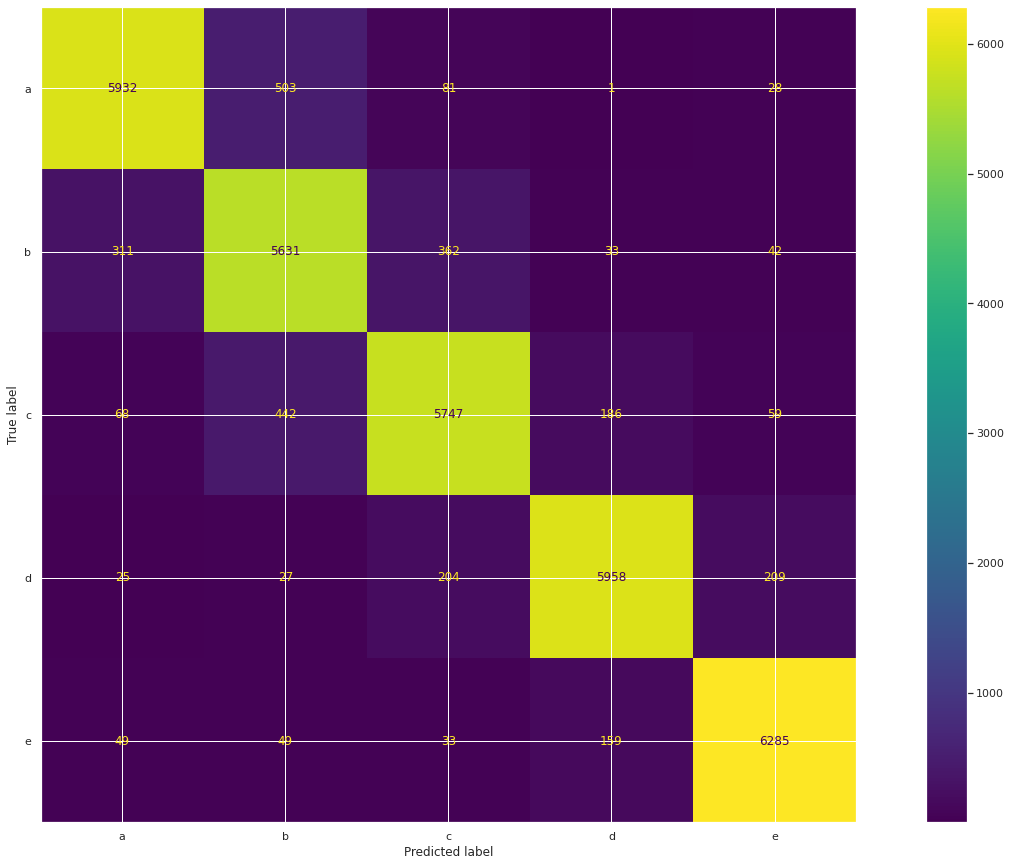

In [227]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
sns.set(rc={"figure.figsize":(25, 15)})
y_pred = pipeline_rf.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)


In [226]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           a       0.93      0.91      0.92      6545
           b       0.85      0.88      0.87      6379
           c       0.89      0.89      0.89      6502
           d       0.94      0.93      0.93      6423
           e       0.95      0.96      0.95      6575

    accuracy                           0.91     32424
   macro avg       0.91      0.91      0.91     32424
weighted avg       0.91      0.91      0.91     32424



## Save model

In [228]:
import pickle
 
# Sauvegarde model Randonforest()
filename = 'modelTest.sav'
pickle.dump(pipeline_rf, open(filename, 'wb'))
 

#Load model
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test,y_test)
print(result)

0.9114544781643227
